# Practicel ML - KNN

### Full Name : Taraneh Khosrojerdi
### Student Number : 400104929

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [36]:
df = pd.read_csv('./train.csv')

print(df.head())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          3  Life Sciences              1            1883   
1                 1          4  Life Sciences              1            1585   
2                 3          3          Other              1            1478   
3                 9          3      Marketing              1            1965   
4                10          3      Marketing              1             722   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                        

Calculate the number of samples

In [37]:
num_samples = df.shape[0]
print(f'Number of samples: {num_samples}')

Number of samples: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [38]:
unique_values = df.nunique()
print(f'Unique values per column:\n{unique_values}')

Unique values per column:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLast

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [39]:
cols_to_remove = unique_values[unique_values < 2].index
df.drop(columns=cols_to_remove, inplace=True)
print(f'Removed columns: {cols_to_remove}')

Removed columns: Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [40]:
# handle uniqueness
unique_business_travel = df['BusinessTravel'].unique()
print(f'Unique values in BusinessTravel column: {unique_business_travel}')


Unique values in BusinessTravel column: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [41]:
# Map the column
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
df['BusinessTravelMapped'] = df['BusinessTravel'].map(business_travel_mapping)
print(df[['BusinessTravel', 'BusinessTravelMapped']].head())

  BusinessTravel  BusinessTravelMapped
0  Travel_Rarely                     1
1  Travel_Rarely                     1
2  Travel_Rarely                     1
3  Travel_Rarely                     1
4  Travel_Rarely                     1


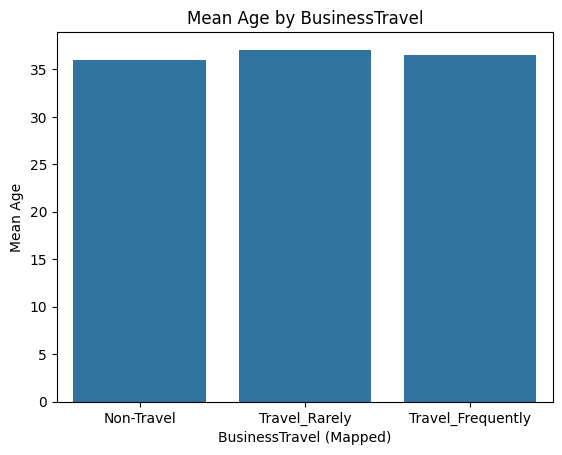

In [42]:
# plot
mean_age_by_travel = df.groupby('BusinessTravelMapped')['Age'].mean().reset_index()
sns.barplot(x='BusinessTravelMapped', y='Age', data=mean_age_by_travel)
plt.title('Mean Age by BusinessTravel')
plt.xlabel('BusinessTravel (Mapped)')
plt.ylabel('Mean Age')
plt.xticks(ticks=[0, 1, 2], labels=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'])
plt.show()


Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

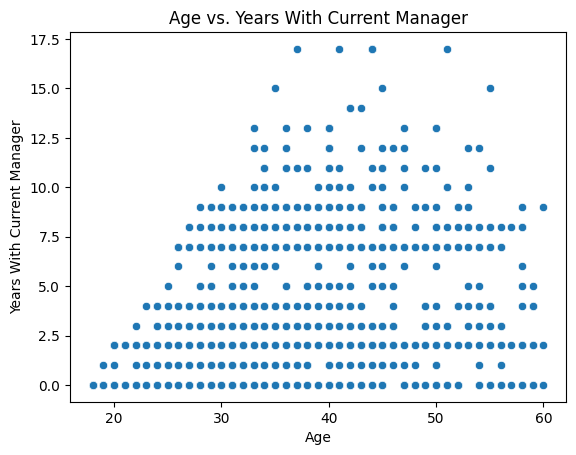

In [43]:
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=df)
plt.title('Age vs. Years With Current Manager')
plt.xlabel('Age')
plt.ylabel('Years With Current Manager')
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany. 

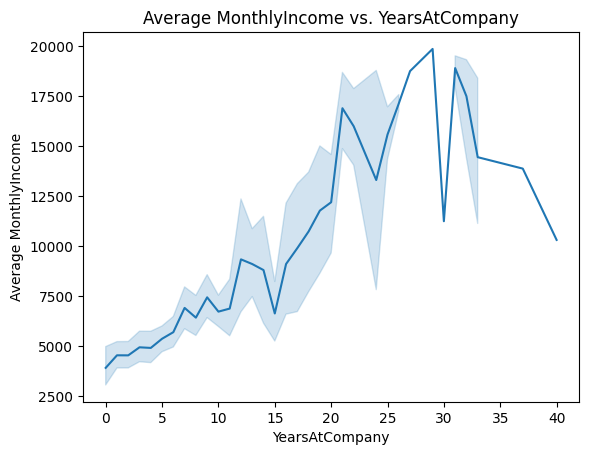

In [44]:
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=df)
plt.title('Average MonthlyIncome vs. YearsAtCompany')
plt.xlabel('YearsAtCompany')
plt.ylabel('Average MonthlyIncome')
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [45]:
# Label encode
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [46]:
# split into train and validation
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [47]:
# lens of train and validation datasets

print(f'Training samples: {len(train_df)}')
print(f'Validation samples: {len(val_df)}')
print(f'Test samples: {len(test_df)}')

Training samples: 660
Validation samples: 221
Test samples: 221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [48]:
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_val = val_df.drop(columns=['Attrition'])
y_val = val_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [49]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k
        
    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        X_test = X_test.to_numpy()
        return np.array([self._predict(x) for x in X_test])
    
    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [50]:
knn = KNN(k=4)
knn.fit(X_train, y_train)

Predict the y_train and y_test values.

In [51]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9090909090909091
Test Accuracy: 0.7692307692307693


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [53]:
y_test_pred_sklearn = knn_sklearn.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_test_pred_sklearn)

print(f'Accuracy: {sklearn_accuracy}')

Accuracy: 0.755656108597285


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**